In [24]:
from PIL import Image, ImageDraw, ImageFont
import string
import random
from random import randint
import cv2
import os
import numpy as np
import keras
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Reshape
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
from sklearn import preprocessing
import matplotlib.pylab as plt

In [25]:
chars = string.ascii_uppercase + string.ascii_lowercase + string.digits
num_classes = len(chars) 
max_car = 10
samples_per_label = 1
input_shape = (30, 100, 1)
batch = 32
epoch = 30
font_dir = '/Users/carolinedavis/desktop/ocr2/test/'

In [26]:
# generates random string of length 10 to be used as label 
def string_generator(chars= chars):
    labels = []
    for i in range(0, 1000):
        size = 10
        label = ''.join(random.choice(chars) for _ in range(size))
        labels.append(label)
    return labels

In [27]:
labels = string_generator()
labels_length = len(labels)
labels[:5]

['toMJ7AFXIF', '8WFDLOMsXA', 'HyfeN6nK6a', 'lnpLf65OhG', 'ybhTtbhi0W']

In [28]:
# generates image from random string for each font 
def make_random_image(font_file, label):
    img = Image.new('RGB', (100, 30), color = (255, 255, 255))
    font = ImageFont.truetype(font_dir + font_file, 15)
    string = label
    d = ImageDraw.Draw(img)
    d.text((10,10), string, font= font, fill=(0, 0, 0))
    img = np.asarray(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

In [29]:
# creates samples with image and label 
def generate_samples():
    random.seed()
    fonts = os.listdir(font_dir)
    results = []
    for font in fonts: 
        for label in range(labels_length):
            target = labels[label]
            print('GENERATING SAMPLES - %s - %s' % (font, target))
            for i in range(samples_per_label):
                sample = make_random_image(font, target)
                results.append((sample, target))
    return results

In [30]:
samples = generate_samples()

GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - toMJ7AFXIF
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 8WFDLOMsXA
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - HyfeN6nK6a
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - lnpLf65OhG
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - ybhTtbhi0W
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - UCIR0GbcAA
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - tYgcVq78tv
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - CgpNbz8hoS
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - EfO3i7n4B2
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - RGKp0paOFg
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - i7uyXNe1b8
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - E9nD9O70MH
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - P3Uyrb6DL6
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - bK00X6isX5
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - BGAJkeNwPy
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - tZShrbKcVZ
GENERATING SAMPLES - SFC

GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 7g8YuA6Pip
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - W5yaoC0buq
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - CJJ1bBzqwT
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - P05NBeHOGo
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - OR2ZSDJla9
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - yNheOPSVK3
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - DlC37EaTVe
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 17kBF4La26
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - gjt7dvFqVp
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - QyOeixIPLz
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - eMTIfvOUtN
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - tfXyDAWGos
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - XXjQQ9UvaG
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - ql91gDv2xP
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - hGOn9D4Ohq
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - RuvTqbj2a1
GENERATING SAMPLES - SFC

GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - yPS4oKTdRS
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - uFO7aPWaoD
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - OBZqZ12pkh
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 1HDSR0EzPm
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - nq6p6PIMfa
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - x6UWC3y2zp
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - CctQzt1d9Y
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - djAXfrQVkL
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - h9n8Ds5W5V
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 4V4KaJRjbB
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 6OxnGpxExm
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - YA4qxzbHVi
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - UXMOC7CHCn
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - xUOL0P4xPJ
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 427EwTEMSn
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 0Yuc1j02E9
GENERATING SAMPLES - SFC

GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - HrUC4lFuG6
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - RPUVU2OPrS
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - UYzJLOp6QB
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - K77eJjTJO0
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - LRQKlFQVUv
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - vCThC2fClb
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - no8ihDIe6N
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 1tB75UfduK
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - ibzyUkbeYH
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - RCLyaod1hl
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 3pjJvnaflc
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - Dzk7alXCTV
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - b98jwW20xa
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 0sl3PtjwsJ
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 3ehbux9a0l
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - uALgOYGkd3
GENERATING SAMPLES - SFC

GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - ZKH66DaQhp
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - drv8gpc2NX
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - YockAKemlB
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 4zouHZ0bNw
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 2o98q0ukpg
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 9eAiAr12do
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - Rfi4uECIIf
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - IKpCjQ1dRg
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - mIJnWfx6wm
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - qME1dO7Gbl
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - Ru7JBgCd2z
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 2yzhYr1LOq
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - ZGyXRzurAV
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - CHvrqq3JlR
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - 5x31xQ6dWB
GENERATING SAMPLES - SFCompactDisplay-Heavy.otf - s6Hia0auj6
GENERATING SAMPLES - SFC

GENERATING SAMPLES - SFCompactText-Medium.otf - R3HEcA8OK9
GENERATING SAMPLES - SFCompactText-Medium.otf - wrFnowEkWh
GENERATING SAMPLES - SFCompactText-Medium.otf - 6pvaYMGxbm
GENERATING SAMPLES - SFCompactText-Medium.otf - KTSMAmi9Xm
GENERATING SAMPLES - SFCompactText-Medium.otf - nCWaCUapo9
GENERATING SAMPLES - SFCompactText-Medium.otf - VmhDy3L33U
GENERATING SAMPLES - SFCompactText-Medium.otf - 2hKsp5kiVg
GENERATING SAMPLES - SFCompactText-Medium.otf - qacjKwsGrp
GENERATING SAMPLES - SFCompactText-Medium.otf - y4qVrm0MQr
GENERATING SAMPLES - SFCompactText-Medium.otf - 04CHzfK5br
GENERATING SAMPLES - SFCompactText-Medium.otf - cjRib0Brwk
GENERATING SAMPLES - SFCompactText-Medium.otf - 0qTvG53NY2
GENERATING SAMPLES - SFCompactText-Medium.otf - hzIzhffd1l
GENERATING SAMPLES - SFCompactText-Medium.otf - pCsiKyjhuZ
GENERATING SAMPLES - SFCompactText-Medium.otf - 9ZS0l1UzqZ
GENERATING SAMPLES - SFCompactText-Medium.otf - mxTNeqb3yW
GENERATING SAMPLES - SFCompactText-Medium.otf - zxbfYwQZ

GENERATING SAMPLES - SFCompactText-Medium.otf - NglTKpkS0v
GENERATING SAMPLES - SFCompactText-Medium.otf - 8w5ts9Y1Mx
GENERATING SAMPLES - SFCompactText-Medium.otf - slVAUmgMa3
GENERATING SAMPLES - SFCompactText-Medium.otf - u2S7PQxpmW
GENERATING SAMPLES - SFCompactText-Medium.otf - ABQ4ELXX3C
GENERATING SAMPLES - SFCompactText-Medium.otf - DsFzZ2SLjH
GENERATING SAMPLES - SFCompactText-Medium.otf - gGQf5alRiW
GENERATING SAMPLES - SFCompactText-Medium.otf - cgDMEmEpff
GENERATING SAMPLES - SFCompactText-Medium.otf - ihE0yKBUh0
GENERATING SAMPLES - SFCompactText-Medium.otf - 8q7m9t0nxC
GENERATING SAMPLES - SFCompactText-Medium.otf - a0324p2fYE
GENERATING SAMPLES - SFCompactText-Medium.otf - 0pylczYcXD
GENERATING SAMPLES - SFCompactText-Medium.otf - DWFVNFShFQ
GENERATING SAMPLES - SFCompactText-Medium.otf - fmDg1DPfkc
GENERATING SAMPLES - SFCompactText-Medium.otf - iwtv2K6Kv7
GENERATING SAMPLES - SFCompactText-Medium.otf - YhQ0XUFy8X
GENERATING SAMPLES - SFCompactText-Medium.otf - 26PlyAgx

GENERATING SAMPLES - SFCompactText-Medium.otf - EBFUjz9t1R
GENERATING SAMPLES - SFCompactText-Medium.otf - ZuYBRIkApZ
GENERATING SAMPLES - SFCompactText-Medium.otf - QuoM4EuMyf
GENERATING SAMPLES - SFCompactText-Medium.otf - 85sI7EwMEz
GENERATING SAMPLES - SFCompactText-Medium.otf - pcF4piFf4f
GENERATING SAMPLES - SFCompactText-Medium.otf - 7r4Zvsidxi
GENERATING SAMPLES - SFCompactText-Medium.otf - GLRpVpCIua
GENERATING SAMPLES - SFCompactText-Medium.otf - 7CjQm0M3TV
GENERATING SAMPLES - SFCompactText-Medium.otf - N2JYVbRjjP
GENERATING SAMPLES - SFCompactText-Medium.otf - 7SMHRkFh6X
GENERATING SAMPLES - SFCompactText-Medium.otf - FIXoVCgDUl
GENERATING SAMPLES - SFCompactText-Medium.otf - zOSQPySJdb
GENERATING SAMPLES - SFCompactText-Medium.otf - XMpx25hIuE
GENERATING SAMPLES - SFCompactText-Medium.otf - E5dY4L7bKI
GENERATING SAMPLES - SFCompactText-Medium.otf - UHYxqUHuRK
GENERATING SAMPLES - SFCompactText-Medium.otf - VLsORvM4Wt
GENERATING SAMPLES - SFCompactText-Medium.otf - OoGXTEpy

GENERATING SAMPLES - SFCompactText-Medium.otf - hzei5m3sPz
GENERATING SAMPLES - SFCompactText-Medium.otf - nqqeayoOFV
GENERATING SAMPLES - SFCompactText-Medium.otf - DQIcoz2U0k
GENERATING SAMPLES - SFCompactText-Medium.otf - Cij3BLe3eU
GENERATING SAMPLES - SFCompactText-Medium.otf - krpKtPpHRb
GENERATING SAMPLES - SFCompactText-Medium.otf - Pn0REbdelW
GENERATING SAMPLES - SFCompactText-Medium.otf - 91GXmdRR8B
GENERATING SAMPLES - SFCompactText-Medium.otf - bUFzW4bZ1z
GENERATING SAMPLES - SFCompactText-Medium.otf - 94vyrmhfKk
GENERATING SAMPLES - SFCompactText-Medium.otf - JAfY3XGV1N
GENERATING SAMPLES - SFCompactText-Medium.otf - TCidRG9YFR
GENERATING SAMPLES - SFCompactText-Medium.otf - eqzpsYP5Kh
GENERATING SAMPLES - SFCompactText-Medium.otf - 06hwVwauvN
GENERATING SAMPLES - SFCompactText-Medium.otf - NNTgpElMJD
GENERATING SAMPLES - SFCompactText-Medium.otf - xapqs2YjlD
GENERATING SAMPLES - SFCompactText-Medium.otf - cDFxrZIuuE
GENERATING SAMPLES - SFCompactText-Medium.otf - KbKgbv3m

GENERATING SAMPLES - SFCompactRounded-Bold.otf - z0KoklYhix
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 3BVHo1A2mh
GENERATING SAMPLES - SFCompactRounded-Bold.otf - NrDrwgGb5O
GENERATING SAMPLES - SFCompactRounded-Bold.otf - vNMRk7KM7m
GENERATING SAMPLES - SFCompactRounded-Bold.otf - l2y8T4p30E
GENERATING SAMPLES - SFCompactRounded-Bold.otf - ZEWrkX9rJc
GENERATING SAMPLES - SFCompactRounded-Bold.otf - w6IJaKxez4
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 8gCWwbc6qU
GENERATING SAMPLES - SFCompactRounded-Bold.otf - zyPTHWdPiS
GENERATING SAMPLES - SFCompactRounded-Bold.otf - pa54flqNSp
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 32KzcAgOfE
GENERATING SAMPLES - SFCompactRounded-Bold.otf - HOjUo2DD3m
GENERATING SAMPLES - SFCompactRounded-Bold.otf - ODp0kiESiY
GENERATING SAMPLES - SFCompactRounded-Bold.otf - Kpiw1CdW3x
GENERATING SAMPLES - SFCompactRounded-Bold.otf - XYCuEM5nDh
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 4qe8EmO3U7
GENERATING SAMPLES - SFCompactRounded-Bo

GENERATING SAMPLES - SFCompactRounded-Bold.otf - a0324p2fYE
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 0pylczYcXD
GENERATING SAMPLES - SFCompactRounded-Bold.otf - DWFVNFShFQ
GENERATING SAMPLES - SFCompactRounded-Bold.otf - fmDg1DPfkc
GENERATING SAMPLES - SFCompactRounded-Bold.otf - iwtv2K6Kv7
GENERATING SAMPLES - SFCompactRounded-Bold.otf - YhQ0XUFy8X
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 26PlyAgxls
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 3pYWSoTUaW
GENERATING SAMPLES - SFCompactRounded-Bold.otf - NmrtWaFtj4
GENERATING SAMPLES - SFCompactRounded-Bold.otf - rSfkCa4OeJ
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 9Z22cO7kEn
GENERATING SAMPLES - SFCompactRounded-Bold.otf - xn1PufJDHn
GENERATING SAMPLES - SFCompactRounded-Bold.otf - Azde5aiYdu
GENERATING SAMPLES - SFCompactRounded-Bold.otf - jSVviu1NyJ
GENERATING SAMPLES - SFCompactRounded-Bold.otf - fgbpyFDsmP
GENERATING SAMPLES - SFCompactRounded-Bold.otf - pUJPepElFD
GENERATING SAMPLES - SFCompactRounded-Bo

GENERATING SAMPLES - SFCompactRounded-Bold.otf - E5dY4L7bKI
GENERATING SAMPLES - SFCompactRounded-Bold.otf - UHYxqUHuRK
GENERATING SAMPLES - SFCompactRounded-Bold.otf - VLsORvM4Wt
GENERATING SAMPLES - SFCompactRounded-Bold.otf - OoGXTEpy0z
GENERATING SAMPLES - SFCompactRounded-Bold.otf - xlhMowG7fI
GENERATING SAMPLES - SFCompactRounded-Bold.otf - biSF64SRBF
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 6kKeh3N26h
GENERATING SAMPLES - SFCompactRounded-Bold.otf - xptWe1EAh9
GENERATING SAMPLES - SFCompactRounded-Bold.otf - YxkawotduN
GENERATING SAMPLES - SFCompactRounded-Bold.otf - u5xfW7LsW6
GENERATING SAMPLES - SFCompactRounded-Bold.otf - khUWVC8TjJ
GENERATING SAMPLES - SFCompactRounded-Bold.otf - rmWqEMwiFO
GENERATING SAMPLES - SFCompactRounded-Bold.otf - vuY8QnIh3D
GENERATING SAMPLES - SFCompactRounded-Bold.otf - WbmM0Rzbvi
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 06qYKHc6NM
GENERATING SAMPLES - SFCompactRounded-Bold.otf - d4ABRYcXck
GENERATING SAMPLES - SFCompactRounded-Bo

GENERATING SAMPLES - SFCompactRounded-Bold.otf - bhm5TelUyL
GENERATING SAMPLES - SFCompactRounded-Bold.otf - hzei5m3sPz
GENERATING SAMPLES - SFCompactRounded-Bold.otf - nqqeayoOFV
GENERATING SAMPLES - SFCompactRounded-Bold.otf - DQIcoz2U0k
GENERATING SAMPLES - SFCompactRounded-Bold.otf - Cij3BLe3eU
GENERATING SAMPLES - SFCompactRounded-Bold.otf - krpKtPpHRb
GENERATING SAMPLES - SFCompactRounded-Bold.otf - Pn0REbdelW
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 91GXmdRR8B
GENERATING SAMPLES - SFCompactRounded-Bold.otf - bUFzW4bZ1z
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 94vyrmhfKk
GENERATING SAMPLES - SFCompactRounded-Bold.otf - JAfY3XGV1N
GENERATING SAMPLES - SFCompactRounded-Bold.otf - TCidRG9YFR
GENERATING SAMPLES - SFCompactRounded-Bold.otf - eqzpsYP5Kh
GENERATING SAMPLES - SFCompactRounded-Bold.otf - 06hwVwauvN
GENERATING SAMPLES - SFCompactRounded-Bold.otf - NNTgpElMJD
GENERATING SAMPLES - SFCompactRounded-Bold.otf - xapqs2YjlD
GENERATING SAMPLES - SFCompactRounded-Bo

GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 3BVHo1A2mh
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - NrDrwgGb5O
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - vNMRk7KM7m
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - l2y8T4p30E
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - ZEWrkX9rJc
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - w6IJaKxez4
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 8gCWwbc6qU
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - zyPTHWdPiS
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - pa54flqNSp
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 32KzcAgOfE
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - HOjUo2DD3m
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - ODp0kiESiY
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - Kpiw1CdW3x
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - XYCuEM5nDh
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 4qe8EmO3U7
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - tdAfkhKiva
GENERATING SAMPLES - SFN

GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - Xvlz4caDe4
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - czThosqnbp
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - HvseDafeAV
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - mNQnjhGmMx
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 5CkJ9EiLGL
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 2PjgOMysiT
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - tnEVEAuzA1
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - QpQs7pMBkZ
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - tnlbuc0XrV
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - lblVKALN36
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - m9JQtFpClh
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - DZIYpZ3z7s
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 1oMTyFsL8N
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - b0NrRfR5F4
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 40v9oQp4kS
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - ra2nmtvOgs
GENERATING SAMPLES - SFN

GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - PLC7fuxCdX
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - NOpEV8JAJF
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - baElTkEWdq
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - lgzqq3t3WE
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - tQHKAZjRxX
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - kjYRx2D1JK
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 4LvFEtyDJV
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - Kg9DFRgvHy
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - qDjSqZx0hW
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - Sviqyir9aY
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - pfow7TtQ4E
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - ceKyrEVShF
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - rOqkrItzUY
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - vuj2GkVaaV
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - thx1MgO3AU
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 5npYti2q28
GENERATING SAMPLES - SFN

GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - zWUoU63GMd
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 82UnPexlNM
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - T9QmCHK56s
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - LCFyeZprVg
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - PU6JmRQd5K
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - C6purOqkiS
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - lVWDoCHR15
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - iwS9DCKifG
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - eNSY0Q1wHF
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 52fDydri8g
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - kWCYCloDYA
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - wgcyhyKzt2
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - fbBoB9RJA9
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - PZAGqgRIjD
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - MHFOqmh9oO
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - q0Lzn0W4sW
GENERATING SAMPLES - SFN

GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - Cz6672uAhJ
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - z8HQFYAvIx
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - TGBH9wmu8p
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - tqlLwSHzb0
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 3KF0hW7Xru
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - XEwLiFDnL2
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 1qGC9qUrlC
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - F7lEgAoPCB
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 3N4wXLGSQu
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 1bs9Qx36EZ
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 9YUk1R4Yvn
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - dewNjNjanN
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - kC2AzV0FMI
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - ltkMOhY1VE
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - wKaajczOCR
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 4mLMWMb7fF
GENERATING SAMPLES - SFN

GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - l5AqYrJXZ8
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - rgDmXs7D0g
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - pXBVvFhe5h
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - W3F2pi85xc
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - lc9odPCkBF
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - IXjw5MBQnP
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 54aEp9sHY4
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - EGGfIBIEWB
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - J7FTTQdLDP
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - xNzv62vj1T
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 71WXIFzRt0
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - XxoG5xNNOs
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - WMimii2ftN
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - YqxBdo6Lml
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - DiuDz69fAt
GENERATING SAMPLES - SFNSTextCondensed-Bold.otf - 2ewJ6ZlK41
GENERATING SAMPLES - SFN

GENERATING SAMPLES - AppleSDGothicNeo.ttc - JHvEhGrPZh
GENERATING SAMPLES - AppleSDGothicNeo.ttc - p4F1lZ7dyE
GENERATING SAMPLES - AppleSDGothicNeo.ttc - G03KXCeP2E
GENERATING SAMPLES - AppleSDGothicNeo.ttc - MEESiQ5uiu
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 2BH37igOrX
GENERATING SAMPLES - AppleSDGothicNeo.ttc - oVyncV188B
GENERATING SAMPLES - AppleSDGothicNeo.ttc - JwPRzDtaei
GENERATING SAMPLES - AppleSDGothicNeo.ttc - z0KoklYhix
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 3BVHo1A2mh
GENERATING SAMPLES - AppleSDGothicNeo.ttc - NrDrwgGb5O
GENERATING SAMPLES - AppleSDGothicNeo.ttc - vNMRk7KM7m
GENERATING SAMPLES - AppleSDGothicNeo.ttc - l2y8T4p30E
GENERATING SAMPLES - AppleSDGothicNeo.ttc - ZEWrkX9rJc
GENERATING SAMPLES - AppleSDGothicNeo.ttc - w6IJaKxez4
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 8gCWwbc6qU
GENERATING SAMPLES - AppleSDGothicNeo.ttc - zyPTHWdPiS
GENERATING SAMPLES - AppleSDGothicNeo.ttc - pa54flqNSp
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 32KzcAgOfE
GENERATING

GENERATING SAMPLES - AppleSDGothicNeo.ttc - cvGDMn7pgR
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 91P4ZHAJ1k
GENERATING SAMPLES - AppleSDGothicNeo.ttc - peFXLUh3Qy
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 1b0DCZ3GMF
GENERATING SAMPLES - AppleSDGothicNeo.ttc - HfTaIUarOK
GENERATING SAMPLES - AppleSDGothicNeo.ttc - HF8CdvaU8a
GENERATING SAMPLES - AppleSDGothicNeo.ttc - M9jqaZ0ZHv
GENERATING SAMPLES - AppleSDGothicNeo.ttc - zAmJl36lbJ
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 0rC7ZXdWda
GENERATING SAMPLES - AppleSDGothicNeo.ttc - fWermCivRM
GENERATING SAMPLES - AppleSDGothicNeo.ttc - SZpftAGO7V
GENERATING SAMPLES - AppleSDGothicNeo.ttc - FnRvhVwaxj
GENERATING SAMPLES - AppleSDGothicNeo.ttc - EXWZXMoZtg
GENERATING SAMPLES - AppleSDGothicNeo.ttc - MFawPzaDjh
GENERATING SAMPLES - AppleSDGothicNeo.ttc - aDFZiQl9pf
GENERATING SAMPLES - AppleSDGothicNeo.ttc - PDQoE8cx3v
GENERATING SAMPLES - AppleSDGothicNeo.ttc - fQBmgfJcmM
GENERATING SAMPLES - AppleSDGothicNeo.ttc - fROq03bdZ8
GENERATING

GENERATING SAMPLES - AppleSDGothicNeo.ttc - wl6O7J4Mxc
GENERATING SAMPLES - AppleSDGothicNeo.ttc - kLKU3cGioX
GENERATING SAMPLES - AppleSDGothicNeo.ttc - vdvsI2aeF0
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 1NkCBXJNLL
GENERATING SAMPLES - AppleSDGothicNeo.ttc - yiW5fCJQee
GENERATING SAMPLES - AppleSDGothicNeo.ttc - dBUoDZZ731
GENERATING SAMPLES - AppleSDGothicNeo.ttc - hAot4r6J3h
GENERATING SAMPLES - AppleSDGothicNeo.ttc - seaIHIB3bW
GENERATING SAMPLES - AppleSDGothicNeo.ttc - KXPbLREgbK
GENERATING SAMPLES - AppleSDGothicNeo.ttc - G7KIdSJXqV
GENERATING SAMPLES - AppleSDGothicNeo.ttc - knoicjzsq0
GENERATING SAMPLES - AppleSDGothicNeo.ttc - suBDxMzhfk
GENERATING SAMPLES - AppleSDGothicNeo.ttc - fYmHTV6YwM
GENERATING SAMPLES - AppleSDGothicNeo.ttc - OHfWeYGn1F
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 80Iebgq76U
GENERATING SAMPLES - AppleSDGothicNeo.ttc - KCrmXKrwfv
GENERATING SAMPLES - AppleSDGothicNeo.ttc - q1avdEHzrY
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 0gmVuvIVeu
GENERATING

GENERATING SAMPLES - AppleSDGothicNeo.ttc - oEej5cY2s3
GENERATING SAMPLES - AppleSDGothicNeo.ttc - dbl0wuWtJH
GENERATING SAMPLES - AppleSDGothicNeo.ttc - c1OGdAYAIa
GENERATING SAMPLES - AppleSDGothicNeo.ttc - ZtebZEt007
GENERATING SAMPLES - AppleSDGothicNeo.ttc - ULZO0glY4s
GENERATING SAMPLES - AppleSDGothicNeo.ttc - Uh3lyizYrw
GENERATING SAMPLES - AppleSDGothicNeo.ttc - dVo4QpYr6W
GENERATING SAMPLES - AppleSDGothicNeo.ttc - E3ymocKzLF
GENERATING SAMPLES - AppleSDGothicNeo.ttc - Uia3I1bPRl
GENERATING SAMPLES - AppleSDGothicNeo.ttc - QwPKp15nU0
GENERATING SAMPLES - AppleSDGothicNeo.ttc - g13Cz6PAHP
GENERATING SAMPLES - AppleSDGothicNeo.ttc - ONgO3d0sIo
GENERATING SAMPLES - AppleSDGothicNeo.ttc - eYAqEL7flq
GENERATING SAMPLES - AppleSDGothicNeo.ttc - D37u6CtT9j
GENERATING SAMPLES - AppleSDGothicNeo.ttc - XzcIIknBvP
GENERATING SAMPLES - AppleSDGothicNeo.ttc - ZiDsp1cPsh
GENERATING SAMPLES - AppleSDGothicNeo.ttc - EYJrEfX6hf
GENERATING SAMPLES - AppleSDGothicNeo.ttc - 6XuZal9MON
GENERATING

GENERATING SAMPLES - SFNSDisplay.ttf - GWZa7G8VY2
GENERATING SAMPLES - SFNSDisplay.ttf - Y72byZdS5e
GENERATING SAMPLES - SFNSDisplay.ttf - g0ST5ydVwz
GENERATING SAMPLES - SFNSDisplay.ttf - 1QRa73aWBi
GENERATING SAMPLES - SFNSDisplay.ttf - k6v0G0rEEy
GENERATING SAMPLES - SFNSDisplay.ttf - RxwXNV7n0t
GENERATING SAMPLES - SFNSDisplay.ttf - CdvMMFkNdx
GENERATING SAMPLES - SFNSDisplay.ttf - yyzSjsCqxD
GENERATING SAMPLES - SFNSDisplay.ttf - 6fjjKBR6h0
GENERATING SAMPLES - SFNSDisplay.ttf - O72rCeYVmE
GENERATING SAMPLES - SFNSDisplay.ttf - iPh4nEJOL4
GENERATING SAMPLES - SFNSDisplay.ttf - 6sf8gH9Fzo
GENERATING SAMPLES - SFNSDisplay.ttf - kZ2tG54MxI
GENERATING SAMPLES - SFNSDisplay.ttf - PyC4a2RIjx
GENERATING SAMPLES - SFNSDisplay.ttf - Tr6O3HBNGa
GENERATING SAMPLES - SFNSDisplay.ttf - U3RwdmCucv
GENERATING SAMPLES - SFNSDisplay.ttf - LyL7dv7o90
GENERATING SAMPLES - SFNSDisplay.ttf - 3lxT9QRHpY
GENERATING SAMPLES - SFNSDisplay.ttf - GPk8VdO4aL
GENERATING SAMPLES - SFNSDisplay.ttf - TeMHQ0LJy5


GENERATING SAMPLES - SFNSDisplay.ttf - aDFZiQl9pf
GENERATING SAMPLES - SFNSDisplay.ttf - PDQoE8cx3v
GENERATING SAMPLES - SFNSDisplay.ttf - fQBmgfJcmM
GENERATING SAMPLES - SFNSDisplay.ttf - fROq03bdZ8
GENERATING SAMPLES - SFNSDisplay.ttf - mNpHNu7DQG
GENERATING SAMPLES - SFNSDisplay.ttf - FEGuSrh7lj
GENERATING SAMPLES - SFNSDisplay.ttf - qiGAPE1uJ5
GENERATING SAMPLES - SFNSDisplay.ttf - PLC7fuxCdX
GENERATING SAMPLES - SFNSDisplay.ttf - NOpEV8JAJF
GENERATING SAMPLES - SFNSDisplay.ttf - baElTkEWdq
GENERATING SAMPLES - SFNSDisplay.ttf - lgzqq3t3WE
GENERATING SAMPLES - SFNSDisplay.ttf - tQHKAZjRxX
GENERATING SAMPLES - SFNSDisplay.ttf - kjYRx2D1JK
GENERATING SAMPLES - SFNSDisplay.ttf - 4LvFEtyDJV
GENERATING SAMPLES - SFNSDisplay.ttf - Kg9DFRgvHy
GENERATING SAMPLES - SFNSDisplay.ttf - qDjSqZx0hW
GENERATING SAMPLES - SFNSDisplay.ttf - Sviqyir9aY
GENERATING SAMPLES - SFNSDisplay.ttf - pfow7TtQ4E
GENERATING SAMPLES - SFNSDisplay.ttf - ceKyrEVShF
GENERATING SAMPLES - SFNSDisplay.ttf - rOqkrItzUY


GENERATING SAMPLES - SFNSDisplay.ttf - UHYxqUHuRK
GENERATING SAMPLES - SFNSDisplay.ttf - VLsORvM4Wt
GENERATING SAMPLES - SFNSDisplay.ttf - OoGXTEpy0z
GENERATING SAMPLES - SFNSDisplay.ttf - xlhMowG7fI
GENERATING SAMPLES - SFNSDisplay.ttf - biSF64SRBF
GENERATING SAMPLES - SFNSDisplay.ttf - 6kKeh3N26h
GENERATING SAMPLES - SFNSDisplay.ttf - xptWe1EAh9
GENERATING SAMPLES - SFNSDisplay.ttf - YxkawotduN
GENERATING SAMPLES - SFNSDisplay.ttf - u5xfW7LsW6
GENERATING SAMPLES - SFNSDisplay.ttf - khUWVC8TjJ
GENERATING SAMPLES - SFNSDisplay.ttf - rmWqEMwiFO
GENERATING SAMPLES - SFNSDisplay.ttf - vuY8QnIh3D
GENERATING SAMPLES - SFNSDisplay.ttf - WbmM0Rzbvi
GENERATING SAMPLES - SFNSDisplay.ttf - 06qYKHc6NM
GENERATING SAMPLES - SFNSDisplay.ttf - d4ABRYcXck
GENERATING SAMPLES - SFNSDisplay.ttf - 0BhANHWZrz
GENERATING SAMPLES - SFNSDisplay.ttf - jhysIaIXRU
GENERATING SAMPLES - SFNSDisplay.ttf - ltKjfAufK3
GENERATING SAMPLES - SFNSDisplay.ttf - pabpJt1Hk3
GENERATING SAMPLES - SFNSDisplay.ttf - G8eEwaNlHz


GENERATING SAMPLES - SFNSDisplay.ttf - 1bs9Qx36EZ
GENERATING SAMPLES - SFNSDisplay.ttf - 9YUk1R4Yvn
GENERATING SAMPLES - SFNSDisplay.ttf - dewNjNjanN
GENERATING SAMPLES - SFNSDisplay.ttf - kC2AzV0FMI
GENERATING SAMPLES - SFNSDisplay.ttf - ltkMOhY1VE
GENERATING SAMPLES - SFNSDisplay.ttf - wKaajczOCR
GENERATING SAMPLES - SFNSDisplay.ttf - 4mLMWMb7fF
GENERATING SAMPLES - SFNSDisplay.ttf - bRsQfVL0EE
GENERATING SAMPLES - SFNSDisplay.ttf - YGuNPEsI6w
GENERATING SAMPLES - SFNSDisplay.ttf - t9BbY67yIu
GENERATING SAMPLES - SFNSDisplay.ttf - r0HSxoj0Ah
GENERATING SAMPLES - SFNSDisplay.ttf - FiFkTtEPuI
GENERATING SAMPLES - SFNSDisplay.ttf - iCeQ4e2mN2
GENERATING SAMPLES - SFNSDisplay.ttf - IDq7kpylUX
GENERATING SAMPLES - SFNSDisplay.ttf - 5HL5X94i4Y
GENERATING SAMPLES - SFNSDisplay.ttf - T3VTWh7xPS
GENERATING SAMPLES - SFNSDisplay.ttf - sO7Ax0tOxY
GENERATING SAMPLES - SFNSDisplay.ttf - ZKH66DaQhp
GENERATING SAMPLES - SFNSDisplay.ttf - drv8gpc2NX
GENERATING SAMPLES - SFNSDisplay.ttf - YockAKemlB


GENERATING SAMPLES - SFNSDisplay.ttf - JpWELcqiuN
GENERATING SAMPLES - SFNSDisplay.ttf - RXeRsdyYfQ
GENERATING SAMPLES - SFNSDisplay.ttf - tLZmngcS1j
GENERATING SAMPLES - SFNSDisplay.ttf - v6JL0T01nm
GENERATING SAMPLES - SFNSDisplay.ttf - BzeKExaQPh
GENERATING SAMPLES - SFNSDisplay.ttf - vtHL4UTdSf
GENERATING SAMPLES - SFNSDisplay.ttf - IGfF9Fg8A9
GENERATING SAMPLES - SFNSDisplay.ttf - KTjtzjLVVU
GENERATING SAMPLES - SFNSDisplay.ttf - 2jC9uVxLO2
GENERATING SAMPLES - SFNSDisplay.ttf - nHk7ZkeDb9
GENERATING SAMPLES - SFNSDisplay.ttf - r5YKB8JapC
GENERATING SAMPLES - SFNSDisplay.ttf - BEaWHW5q34
GENERATING SAMPLES - SFNSDisplay.ttf - c12njk7r1c
GENERATING SAMPLES - SFNSDisplay.ttf - wqrMYL6XJf
GENERATING SAMPLES - SFNSDisplay.ttf - z7czV4lBAJ
GENERATING SAMPLES - SFNSDisplay.ttf - h1x6BEKg6v
GENERATING SAMPLES - SFNSDisplay.ttf - cfC16tvmEl
GENERATING SAMPLES - SFNSDisplay.ttf - Rscg1Gk8VA
GENERATING SAMPLES - SFNSDisplay.ttf - lvfZg8tjGg
GENERATING SAMPLES - SFNSDisplay.ttf - hagBztOEuu


GENERATING SAMPLES - Menlo.ttc - ql91gDv2xP
GENERATING SAMPLES - Menlo.ttc - hGOn9D4Ohq
GENERATING SAMPLES - Menlo.ttc - RuvTqbj2a1
GENERATING SAMPLES - Menlo.ttc - z6C0xUpwpr
GENERATING SAMPLES - Menlo.ttc - q7z7K5fFv6
GENERATING SAMPLES - Menlo.ttc - b0L829Rj58
GENERATING SAMPLES - Menlo.ttc - M1hFQSdTQm
GENERATING SAMPLES - Menlo.ttc - A0s2NL69iC
GENERATING SAMPLES - Menlo.ttc - VvQNl6kfjY
GENERATING SAMPLES - Menlo.ttc - UgE0dy1Upw
GENERATING SAMPLES - Menlo.ttc - 79QJbRQUPZ
GENERATING SAMPLES - Menlo.ttc - kReIrexpUc
GENERATING SAMPLES - Menlo.ttc - xouyMOikzN
GENERATING SAMPLES - Menlo.ttc - XP9K2CQ5BG
GENERATING SAMPLES - Menlo.ttc - Q08EjGDl4Q
GENERATING SAMPLES - Menlo.ttc - uAoOs68ixk
GENERATING SAMPLES - Menlo.ttc - mN4iUHbBa7
GENERATING SAMPLES - Menlo.ttc - hJT6h15vSq
GENERATING SAMPLES - Menlo.ttc - ewJstP7tAB
GENERATING SAMPLES - Menlo.ttc - y3FrMFFG1m
GENERATING SAMPLES - Menlo.ttc - zHK50YoCBQ
GENERATING SAMPLES - Menlo.ttc - 5JI37aJ975
GENERATING SAMPLES - Menlo.ttc -

GENERATING SAMPLES - Menlo.ttc - eNSY0Q1wHF
GENERATING SAMPLES - Menlo.ttc - 52fDydri8g
GENERATING SAMPLES - Menlo.ttc - kWCYCloDYA
GENERATING SAMPLES - Menlo.ttc - wgcyhyKzt2
GENERATING SAMPLES - Menlo.ttc - fbBoB9RJA9
GENERATING SAMPLES - Menlo.ttc - PZAGqgRIjD
GENERATING SAMPLES - Menlo.ttc - MHFOqmh9oO
GENERATING SAMPLES - Menlo.ttc - q0Lzn0W4sW
GENERATING SAMPLES - Menlo.ttc - IbzRoLWgOE
GENERATING SAMPLES - Menlo.ttc - dp39FWXPkU
GENERATING SAMPLES - Menlo.ttc - UWgNl0xZKk
GENERATING SAMPLES - Menlo.ttc - J29Xph12sj
GENERATING SAMPLES - Menlo.ttc - 2gVBnBjsS9
GENERATING SAMPLES - Menlo.ttc - m495HvC4DL
GENERATING SAMPLES - Menlo.ttc - d8RqrVrkBV
GENERATING SAMPLES - Menlo.ttc - VtWH0VR7Jk
GENERATING SAMPLES - Menlo.ttc - 73EqY6FTLF
GENERATING SAMPLES - Menlo.ttc - UBTEFv6LEk
GENERATING SAMPLES - Menlo.ttc - dVUoffWXsI
GENERATING SAMPLES - Menlo.ttc - fqNNPLAb7X
GENERATING SAMPLES - Menlo.ttc - l9Aacx7dl3
GENERATING SAMPLES - Menlo.ttc - 5uUzJes38O
GENERATING SAMPLES - Menlo.ttc -

GENERATING SAMPLES - Menlo.ttc - r0HSxoj0Ah
GENERATING SAMPLES - Menlo.ttc - FiFkTtEPuI
GENERATING SAMPLES - Menlo.ttc - iCeQ4e2mN2
GENERATING SAMPLES - Menlo.ttc - IDq7kpylUX
GENERATING SAMPLES - Menlo.ttc - 5HL5X94i4Y
GENERATING SAMPLES - Menlo.ttc - T3VTWh7xPS
GENERATING SAMPLES - Menlo.ttc - sO7Ax0tOxY
GENERATING SAMPLES - Menlo.ttc - ZKH66DaQhp
GENERATING SAMPLES - Menlo.ttc - drv8gpc2NX
GENERATING SAMPLES - Menlo.ttc - YockAKemlB
GENERATING SAMPLES - Menlo.ttc - 4zouHZ0bNw
GENERATING SAMPLES - Menlo.ttc - 2o98q0ukpg
GENERATING SAMPLES - Menlo.ttc - 9eAiAr12do
GENERATING SAMPLES - Menlo.ttc - Rfi4uECIIf
GENERATING SAMPLES - Menlo.ttc - IKpCjQ1dRg
GENERATING SAMPLES - Menlo.ttc - mIJnWfx6wm
GENERATING SAMPLES - Menlo.ttc - qME1dO7Gbl
GENERATING SAMPLES - Menlo.ttc - Ru7JBgCd2z
GENERATING SAMPLES - Menlo.ttc - 2yzhYr1LOq
GENERATING SAMPLES - Menlo.ttc - ZGyXRzurAV
GENERATING SAMPLES - Menlo.ttc - CHvrqq3JlR
GENERATING SAMPLES - Menlo.ttc - 5x31xQ6dWB
GENERATING SAMPLES - Menlo.ttc -

GENERATING SAMPLES - STHeiti Medium.ttc - 04CHzfK5br
GENERATING SAMPLES - STHeiti Medium.ttc - cjRib0Brwk
GENERATING SAMPLES - STHeiti Medium.ttc - 0qTvG53NY2
GENERATING SAMPLES - STHeiti Medium.ttc - hzIzhffd1l
GENERATING SAMPLES - STHeiti Medium.ttc - pCsiKyjhuZ
GENERATING SAMPLES - STHeiti Medium.ttc - 9ZS0l1UzqZ
GENERATING SAMPLES - STHeiti Medium.ttc - mxTNeqb3yW
GENERATING SAMPLES - STHeiti Medium.ttc - zxbfYwQZLx
GENERATING SAMPLES - STHeiti Medium.ttc - mIJfWp9oi8
GENERATING SAMPLES - STHeiti Medium.ttc - lNDEfnYgvm
GENERATING SAMPLES - STHeiti Medium.ttc - sNGK2JMobY
GENERATING SAMPLES - STHeiti Medium.ttc - YZtsqOGKrX
GENERATING SAMPLES - STHeiti Medium.ttc - U4Smsp19ll
GENERATING SAMPLES - STHeiti Medium.ttc - JHvEhGrPZh
GENERATING SAMPLES - STHeiti Medium.ttc - p4F1lZ7dyE
GENERATING SAMPLES - STHeiti Medium.ttc - G03KXCeP2E
GENERATING SAMPLES - STHeiti Medium.ttc - MEESiQ5uiu
GENERATING SAMPLES - STHeiti Medium.ttc - 2BH37igOrX
GENERATING SAMPLES - STHeiti Medium.ttc - oVyn

GENERATING SAMPLES - STHeiti Medium.ttc - ewJstP7tAB
GENERATING SAMPLES - STHeiti Medium.ttc - y3FrMFFG1m
GENERATING SAMPLES - STHeiti Medium.ttc - zHK50YoCBQ
GENERATING SAMPLES - STHeiti Medium.ttc - 5JI37aJ975
GENERATING SAMPLES - STHeiti Medium.ttc - RmJKkWQf71
GENERATING SAMPLES - STHeiti Medium.ttc - tCRsn77XY3
GENERATING SAMPLES - STHeiti Medium.ttc - RUPL3NhL6N
GENERATING SAMPLES - STHeiti Medium.ttc - VTMOezeKzu
GENERATING SAMPLES - STHeiti Medium.ttc - uUhoAa0VOb
GENERATING SAMPLES - STHeiti Medium.ttc - ZcVD6zE6Yi
GENERATING SAMPLES - STHeiti Medium.ttc - NuslVFagv3
GENERATING SAMPLES - STHeiti Medium.ttc - gp2zAmlDq2
GENERATING SAMPLES - STHeiti Medium.ttc - 7XicfNkl8C
GENERATING SAMPLES - STHeiti Medium.ttc - 6Pc2t4h85T
GENERATING SAMPLES - STHeiti Medium.ttc - aeRbF5gMFO
GENERATING SAMPLES - STHeiti Medium.ttc - 2IXoIpaM6u
GENERATING SAMPLES - STHeiti Medium.ttc - 9cLCq2Dk1M
GENERATING SAMPLES - STHeiti Medium.ttc - RAHgiaTGk4
GENERATING SAMPLES - STHeiti Medium.ttc - 5JrT

GENERATING SAMPLES - STHeiti Medium.ttc - q0Lzn0W4sW
GENERATING SAMPLES - STHeiti Medium.ttc - IbzRoLWgOE
GENERATING SAMPLES - STHeiti Medium.ttc - dp39FWXPkU
GENERATING SAMPLES - STHeiti Medium.ttc - UWgNl0xZKk
GENERATING SAMPLES - STHeiti Medium.ttc - J29Xph12sj
GENERATING SAMPLES - STHeiti Medium.ttc - 2gVBnBjsS9
GENERATING SAMPLES - STHeiti Medium.ttc - m495HvC4DL
GENERATING SAMPLES - STHeiti Medium.ttc - d8RqrVrkBV
GENERATING SAMPLES - STHeiti Medium.ttc - VtWH0VR7Jk
GENERATING SAMPLES - STHeiti Medium.ttc - 73EqY6FTLF
GENERATING SAMPLES - STHeiti Medium.ttc - UBTEFv6LEk
GENERATING SAMPLES - STHeiti Medium.ttc - dVUoffWXsI
GENERATING SAMPLES - STHeiti Medium.ttc - fqNNPLAb7X
GENERATING SAMPLES - STHeiti Medium.ttc - l9Aacx7dl3
GENERATING SAMPLES - STHeiti Medium.ttc - 5uUzJes38O
GENERATING SAMPLES - STHeiti Medium.ttc - iOXo2udnSr
GENERATING SAMPLES - STHeiti Medium.ttc - D0PsKEJ1y9
GENERATING SAMPLES - STHeiti Medium.ttc - 5GnQwFlTxT
GENERATING SAMPLES - STHeiti Medium.ttc - USs7

GENERATING SAMPLES - STHeiti Medium.ttc - RfK5MAeEIA
GENERATING SAMPLES - STHeiti Medium.ttc - Iz6m13ruba
GENERATING SAMPLES - STHeiti Medium.ttc - yklqdXXfWf
GENERATING SAMPLES - STHeiti Medium.ttc - MyCHfqSFE7
GENERATING SAMPLES - STHeiti Medium.ttc - OKAgA677Kk
GENERATING SAMPLES - STHeiti Medium.ttc - Cz6672uAhJ
GENERATING SAMPLES - STHeiti Medium.ttc - z8HQFYAvIx
GENERATING SAMPLES - STHeiti Medium.ttc - TGBH9wmu8p
GENERATING SAMPLES - STHeiti Medium.ttc - tqlLwSHzb0
GENERATING SAMPLES - STHeiti Medium.ttc - 3KF0hW7Xru
GENERATING SAMPLES - STHeiti Medium.ttc - XEwLiFDnL2
GENERATING SAMPLES - STHeiti Medium.ttc - 1qGC9qUrlC
GENERATING SAMPLES - STHeiti Medium.ttc - F7lEgAoPCB
GENERATING SAMPLES - STHeiti Medium.ttc - 3N4wXLGSQu
GENERATING SAMPLES - STHeiti Medium.ttc - 1bs9Qx36EZ
GENERATING SAMPLES - STHeiti Medium.ttc - 9YUk1R4Yvn
GENERATING SAMPLES - STHeiti Medium.ttc - dewNjNjanN
GENERATING SAMPLES - STHeiti Medium.ttc - kC2AzV0FMI
GENERATING SAMPLES - STHeiti Medium.ttc - ltkM

GENERATING SAMPLES - STHeiti Medium.ttc - YpuRV4Vlvh
GENERATING SAMPLES - STHeiti Medium.ttc - EK3NxmwA34
GENERATING SAMPLES - STHeiti Medium.ttc - C7nO3BSLwT
GENERATING SAMPLES - SFCompactRounded-Medium.otf - toMJ7AFXIF
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 8WFDLOMsXA
GENERATING SAMPLES - SFCompactRounded-Medium.otf - HyfeN6nK6a
GENERATING SAMPLES - SFCompactRounded-Medium.otf - lnpLf65OhG
GENERATING SAMPLES - SFCompactRounded-Medium.otf - ybhTtbhi0W
GENERATING SAMPLES - SFCompactRounded-Medium.otf - UCIR0GbcAA
GENERATING SAMPLES - SFCompactRounded-Medium.otf - tYgcVq78tv
GENERATING SAMPLES - SFCompactRounded-Medium.otf - CgpNbz8hoS
GENERATING SAMPLES - SFCompactRounded-Medium.otf - EfO3i7n4B2
GENERATING SAMPLES - SFCompactRounded-Medium.otf - RGKp0paOFg
GENERATING SAMPLES - SFCompactRounded-Medium.otf - i7uyXNe1b8
GENERATING SAMPLES - SFCompactRounded-Medium.otf - E9nD9O70MH
GENERATING SAMPLES - SFCompactRounded-Medium.otf - P3Uyrb6DL6
GENERATING SAMPLES - SFCompactRound

GENERATING SAMPLES - SFCompactRounded-Medium.otf - yNheOPSVK3
GENERATING SAMPLES - SFCompactRounded-Medium.otf - DlC37EaTVe
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 17kBF4La26
GENERATING SAMPLES - SFCompactRounded-Medium.otf - gjt7dvFqVp
GENERATING SAMPLES - SFCompactRounded-Medium.otf - QyOeixIPLz
GENERATING SAMPLES - SFCompactRounded-Medium.otf - eMTIfvOUtN
GENERATING SAMPLES - SFCompactRounded-Medium.otf - tfXyDAWGos
GENERATING SAMPLES - SFCompactRounded-Medium.otf - XXjQQ9UvaG
GENERATING SAMPLES - SFCompactRounded-Medium.otf - ql91gDv2xP
GENERATING SAMPLES - SFCompactRounded-Medium.otf - hGOn9D4Ohq
GENERATING SAMPLES - SFCompactRounded-Medium.otf - RuvTqbj2a1
GENERATING SAMPLES - SFCompactRounded-Medium.otf - z6C0xUpwpr
GENERATING SAMPLES - SFCompactRounded-Medium.otf - q7z7K5fFv6
GENERATING SAMPLES - SFCompactRounded-Medium.otf - b0L829Rj58
GENERATING SAMPLES - SFCompactRounded-Medium.otf - M1hFQSdTQm
GENERATING SAMPLES - SFCompactRounded-Medium.otf - A0s2NL69iC
GENERATI

GENERATING SAMPLES - SFCompactRounded-Medium.otf - PU6JmRQd5K
GENERATING SAMPLES - SFCompactRounded-Medium.otf - C6purOqkiS
GENERATING SAMPLES - SFCompactRounded-Medium.otf - lVWDoCHR15
GENERATING SAMPLES - SFCompactRounded-Medium.otf - iwS9DCKifG
GENERATING SAMPLES - SFCompactRounded-Medium.otf - eNSY0Q1wHF
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 52fDydri8g
GENERATING SAMPLES - SFCompactRounded-Medium.otf - kWCYCloDYA
GENERATING SAMPLES - SFCompactRounded-Medium.otf - wgcyhyKzt2
GENERATING SAMPLES - SFCompactRounded-Medium.otf - fbBoB9RJA9
GENERATING SAMPLES - SFCompactRounded-Medium.otf - PZAGqgRIjD
GENERATING SAMPLES - SFCompactRounded-Medium.otf - MHFOqmh9oO
GENERATING SAMPLES - SFCompactRounded-Medium.otf - q0Lzn0W4sW
GENERATING SAMPLES - SFCompactRounded-Medium.otf - IbzRoLWgOE
GENERATING SAMPLES - SFCompactRounded-Medium.otf - dp39FWXPkU
GENERATING SAMPLES - SFCompactRounded-Medium.otf - UWgNl0xZKk
GENERATING SAMPLES - SFCompactRounded-Medium.otf - J29Xph12sj
GENERATI

GENERATING SAMPLES - SFCompactRounded-Medium.otf - aRwn5osEZ4
GENERATING SAMPLES - SFCompactRounded-Medium.otf - rNHBThvQK4
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 4ljoi41BXK
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 8WWYe2TLwh
GENERATING SAMPLES - SFCompactRounded-Medium.otf - devuIEkOIh
GENERATING SAMPLES - SFCompactRounded-Medium.otf - GrXHtzP9dz
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 5Sg4opN8Ae
GENERATING SAMPLES - SFCompactRounded-Medium.otf - knhUhEZP7M
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 8ulFGHKyPX
GENERATING SAMPLES - SFCompactRounded-Medium.otf - 0VlflIMBch
GENERATING SAMPLES - SFCompactRounded-Medium.otf - RfK5MAeEIA
GENERATING SAMPLES - SFCompactRounded-Medium.otf - Iz6m13ruba
GENERATING SAMPLES - SFCompactRounded-Medium.otf - yklqdXXfWf
GENERATING SAMPLES - SFCompactRounded-Medium.otf - MyCHfqSFE7
GENERATING SAMPLES - SFCompactRounded-Medium.otf - OKAgA677Kk
GENERATING SAMPLES - SFCompactRounded-Medium.otf - Cz6672uAhJ
GENERATI

GENERATING SAMPLES - SFCompactRounded-Medium.otf - h1x6BEKg6v
GENERATING SAMPLES - SFCompactRounded-Medium.otf - cfC16tvmEl
GENERATING SAMPLES - SFCompactRounded-Medium.otf - Rscg1Gk8VA
GENERATING SAMPLES - SFCompactRounded-Medium.otf - lvfZg8tjGg
GENERATING SAMPLES - SFCompactRounded-Medium.otf - hagBztOEuu
GENERATING SAMPLES - SFCompactRounded-Medium.otf - gTeFrWv9He
GENERATING SAMPLES - SFCompactRounded-Medium.otf - Ie4VsjF9q5
GENERATING SAMPLES - SFCompactRounded-Medium.otf - yh6VTi6Vuo
GENERATING SAMPLES - SFCompactRounded-Medium.otf - YpuRV4Vlvh
GENERATING SAMPLES - SFCompactRounded-Medium.otf - EK3NxmwA34
GENERATING SAMPLES - SFCompactRounded-Medium.otf - C7nO3BSLwT
GENERATING SAMPLES - Hiragino Sans GB.ttc - toMJ7AFXIF
GENERATING SAMPLES - Hiragino Sans GB.ttc - 8WFDLOMsXA
GENERATING SAMPLES - Hiragino Sans GB.ttc - HyfeN6nK6a
GENERATING SAMPLES - Hiragino Sans GB.ttc - lnpLf65OhG
GENERATING SAMPLES - Hiragino Sans GB.ttc - ybhTtbhi0W
GENERATING SAMPLES - Hiragino Sans GB.ttc -

GENERATING SAMPLES - Hiragino Sans GB.ttc - xEfCLBt0AB
GENERATING SAMPLES - Hiragino Sans GB.ttc - 06wnvlJB4H
GENERATING SAMPLES - Hiragino Sans GB.ttc - GqwQLPbY2y
GENERATING SAMPLES - Hiragino Sans GB.ttc - zZaIjjbnRN
GENERATING SAMPLES - Hiragino Sans GB.ttc - 9dbbNUt4t7
GENERATING SAMPLES - Hiragino Sans GB.ttc - FMHZpBc8UY
GENERATING SAMPLES - Hiragino Sans GB.ttc - NcHOmt58dL
GENERATING SAMPLES - Hiragino Sans GB.ttc - vyAEO1dk5J
GENERATING SAMPLES - Hiragino Sans GB.ttc - 5zBwGR0VJd
GENERATING SAMPLES - Hiragino Sans GB.ttc - qKa3Y1u7Dd
GENERATING SAMPLES - Hiragino Sans GB.ttc - VktIdJDCcO
GENERATING SAMPLES - Hiragino Sans GB.ttc - WNwvPyCKm8
GENERATING SAMPLES - Hiragino Sans GB.ttc - lo9wmbMi0y
GENERATING SAMPLES - Hiragino Sans GB.ttc - e0nwptTIYa
GENERATING SAMPLES - Hiragino Sans GB.ttc - EfaldLm89n
GENERATING SAMPLES - Hiragino Sans GB.ttc - 3QKZ5QFh3m
GENERATING SAMPLES - Hiragino Sans GB.ttc - cxo6BUZCmf
GENERATING SAMPLES - Hiragino Sans GB.ttc - 88s68lDt5T
GENERATING

GENERATING SAMPLES - Hiragino Sans GB.ttc - FEGuSrh7lj
GENERATING SAMPLES - Hiragino Sans GB.ttc - qiGAPE1uJ5
GENERATING SAMPLES - Hiragino Sans GB.ttc - PLC7fuxCdX
GENERATING SAMPLES - Hiragino Sans GB.ttc - NOpEV8JAJF
GENERATING SAMPLES - Hiragino Sans GB.ttc - baElTkEWdq
GENERATING SAMPLES - Hiragino Sans GB.ttc - lgzqq3t3WE
GENERATING SAMPLES - Hiragino Sans GB.ttc - tQHKAZjRxX
GENERATING SAMPLES - Hiragino Sans GB.ttc - kjYRx2D1JK
GENERATING SAMPLES - Hiragino Sans GB.ttc - 4LvFEtyDJV
GENERATING SAMPLES - Hiragino Sans GB.ttc - Kg9DFRgvHy
GENERATING SAMPLES - Hiragino Sans GB.ttc - qDjSqZx0hW
GENERATING SAMPLES - Hiragino Sans GB.ttc - Sviqyir9aY
GENERATING SAMPLES - Hiragino Sans GB.ttc - pfow7TtQ4E
GENERATING SAMPLES - Hiragino Sans GB.ttc - ceKyrEVShF
GENERATING SAMPLES - Hiragino Sans GB.ttc - rOqkrItzUY
GENERATING SAMPLES - Hiragino Sans GB.ttc - vuj2GkVaaV
GENERATING SAMPLES - Hiragino Sans GB.ttc - thx1MgO3AU
GENERATING SAMPLES - Hiragino Sans GB.ttc - 5npYti2q28
GENERATING

GENERATING SAMPLES - Hiragino Sans GB.ttc - OoGXTEpy0z
GENERATING SAMPLES - Hiragino Sans GB.ttc - xlhMowG7fI
GENERATING SAMPLES - Hiragino Sans GB.ttc - biSF64SRBF
GENERATING SAMPLES - Hiragino Sans GB.ttc - 6kKeh3N26h
GENERATING SAMPLES - Hiragino Sans GB.ttc - xptWe1EAh9
GENERATING SAMPLES - Hiragino Sans GB.ttc - YxkawotduN
GENERATING SAMPLES - Hiragino Sans GB.ttc - u5xfW7LsW6
GENERATING SAMPLES - Hiragino Sans GB.ttc - khUWVC8TjJ
GENERATING SAMPLES - Hiragino Sans GB.ttc - rmWqEMwiFO
GENERATING SAMPLES - Hiragino Sans GB.ttc - vuY8QnIh3D
GENERATING SAMPLES - Hiragino Sans GB.ttc - WbmM0Rzbvi
GENERATING SAMPLES - Hiragino Sans GB.ttc - 06qYKHc6NM
GENERATING SAMPLES - Hiragino Sans GB.ttc - d4ABRYcXck
GENERATING SAMPLES - Hiragino Sans GB.ttc - 0BhANHWZrz
GENERATING SAMPLES - Hiragino Sans GB.ttc - jhysIaIXRU
GENERATING SAMPLES - Hiragino Sans GB.ttc - ltKjfAufK3
GENERATING SAMPLES - Hiragino Sans GB.ttc - pabpJt1Hk3
GENERATING SAMPLES - Hiragino Sans GB.ttc - G8eEwaNlHz
GENERATING

GENERATING SAMPLES - Hiragino Sans GB.ttc - tO64taa0N4
GENERATING SAMPLES - Hiragino Sans GB.ttc - sbfvOq5VuD
GENERATING SAMPLES - Hiragino Sans GB.ttc - CK1wQl3r3K
GENERATING SAMPLES - Hiragino Sans GB.ttc - 0Dizlt22vH
GENERATING SAMPLES - Hiragino Sans GB.ttc - OpqOFpxy9w
GENERATING SAMPLES - Hiragino Sans GB.ttc - zHiKKq0Crn
GENERATING SAMPLES - Hiragino Sans GB.ttc - nULRMOkSbs
GENERATING SAMPLES - Hiragino Sans GB.ttc - 7bxPozhDWK
GENERATING SAMPLES - Hiragino Sans GB.ttc - OmZbf4GCjM
GENERATING SAMPLES - Hiragino Sans GB.ttc - 3ilPD792Lt
GENERATING SAMPLES - Hiragino Sans GB.ttc - aRwn5osEZ4
GENERATING SAMPLES - Hiragino Sans GB.ttc - rNHBThvQK4
GENERATING SAMPLES - Hiragino Sans GB.ttc - 4ljoi41BXK
GENERATING SAMPLES - Hiragino Sans GB.ttc - 8WWYe2TLwh
GENERATING SAMPLES - Hiragino Sans GB.ttc - devuIEkOIh
GENERATING SAMPLES - Hiragino Sans GB.ttc - GrXHtzP9dz
GENERATING SAMPLES - Hiragino Sans GB.ttc - 5Sg4opN8Ae
GENERATING SAMPLES - Hiragino Sans GB.ttc - knhUhEZP7M
GENERATING

GENERATING SAMPLES - Hiragino Sans GB.ttc - mU7ccN5q8R
GENERATING SAMPLES - Hiragino Sans GB.ttc - YKwd5Zn53L
GENERATING SAMPLES - Hiragino Sans GB.ttc - y3wmDk5Jel
GENERATING SAMPLES - Hiragino Sans GB.ttc - HXP5NHaYg6
GENERATING SAMPLES - Hiragino Sans GB.ttc - 6BRJHVliFt
GENERATING SAMPLES - Hiragino Sans GB.ttc - 8bof06LEAf
GENERATING SAMPLES - Hiragino Sans GB.ttc - pXXDT3miqv
GENERATING SAMPLES - Hiragino Sans GB.ttc - H7gZ5vdiGg
GENERATING SAMPLES - Hiragino Sans GB.ttc - fwbRUufbdM
GENERATING SAMPLES - Hiragino Sans GB.ttc - kXT7AmgCpH
GENERATING SAMPLES - Hiragino Sans GB.ttc - 8b1DloRde4
GENERATING SAMPLES - Hiragino Sans GB.ttc - Y4SFVQamNo
GENERATING SAMPLES - Hiragino Sans GB.ttc - l5AqYrJXZ8
GENERATING SAMPLES - Hiragino Sans GB.ttc - rgDmXs7D0g
GENERATING SAMPLES - Hiragino Sans GB.ttc - pXBVvFhe5h
GENERATING SAMPLES - Hiragino Sans GB.ttc - W3F2pi85xc
GENERATING SAMPLES - Hiragino Sans GB.ttc - lc9odPCkBF
GENERATING SAMPLES - Hiragino Sans GB.ttc - IXjw5MBQnP
GENERATING

GENERATING SAMPLES - HelveticaNeue.ttc - j5gn95xFJs
GENERATING SAMPLES - HelveticaNeue.ttc - DQQ1tcffed
GENERATING SAMPLES - HelveticaNeue.ttc - F3AUay3P9C
GENERATING SAMPLES - HelveticaNeue.ttc - JgWkviDCfH
GENERATING SAMPLES - HelveticaNeue.ttc - QAF5HiSYRN
GENERATING SAMPLES - HelveticaNeue.ttc - mCzqjIKsVm
GENERATING SAMPLES - HelveticaNeue.ttc - GWZa7G8VY2
GENERATING SAMPLES - HelveticaNeue.ttc - Y72byZdS5e
GENERATING SAMPLES - HelveticaNeue.ttc - g0ST5ydVwz
GENERATING SAMPLES - HelveticaNeue.ttc - 1QRa73aWBi
GENERATING SAMPLES - HelveticaNeue.ttc - k6v0G0rEEy
GENERATING SAMPLES - HelveticaNeue.ttc - RxwXNV7n0t
GENERATING SAMPLES - HelveticaNeue.ttc - CdvMMFkNdx
GENERATING SAMPLES - HelveticaNeue.ttc - yyzSjsCqxD
GENERATING SAMPLES - HelveticaNeue.ttc - 6fjjKBR6h0
GENERATING SAMPLES - HelveticaNeue.ttc - O72rCeYVmE
GENERATING SAMPLES - HelveticaNeue.ttc - iPh4nEJOL4
GENERATING SAMPLES - HelveticaNeue.ttc - 6sf8gH9Fzo
GENERATING SAMPLES - HelveticaNeue.ttc - kZ2tG54MxI
GENERATING S

GENERATING SAMPLES - HelveticaNeue.ttc - dBUqRm6sPo
GENERATING SAMPLES - HelveticaNeue.ttc - aVWDFVyqcC
GENERATING SAMPLES - HelveticaNeue.ttc - IBqJ47B3uE
GENERATING SAMPLES - HelveticaNeue.ttc - whyj58CWRt
GENERATING SAMPLES - HelveticaNeue.ttc - Wh8HKaT5uW
GENERATING SAMPLES - HelveticaNeue.ttc - L7qspIQLny
GENERATING SAMPLES - HelveticaNeue.ttc - Aaz1T26gGx
GENERATING SAMPLES - HelveticaNeue.ttc - fe0tfmDiaB
GENERATING SAMPLES - HelveticaNeue.ttc - DAhxKALAVv
GENERATING SAMPLES - HelveticaNeue.ttc - CnVZ5I4WFx
GENERATING SAMPLES - HelveticaNeue.ttc - fagTIa8XUY
GENERATING SAMPLES - HelveticaNeue.ttc - JIzBtUIOPi
GENERATING SAMPLES - HelveticaNeue.ttc - itsknQ4YJA
GENERATING SAMPLES - HelveticaNeue.ttc - 2YSoqxVila
GENERATING SAMPLES - HelveticaNeue.ttc - YbXn9bYTfh
GENERATING SAMPLES - HelveticaNeue.ttc - PeWzyt3NGS
GENERATING SAMPLES - HelveticaNeue.ttc - nygsNYDhHX
GENERATING SAMPLES - HelveticaNeue.ttc - NvJyzfYgI5
GENERATING SAMPLES - HelveticaNeue.ttc - Zo0AAyIgg1
GENERATING S

GENERATING SAMPLES - HelveticaNeue.ttc - Dzk7alXCTV
GENERATING SAMPLES - HelveticaNeue.ttc - b98jwW20xa
GENERATING SAMPLES - HelveticaNeue.ttc - 0sl3PtjwsJ
GENERATING SAMPLES - HelveticaNeue.ttc - 3ehbux9a0l
GENERATING SAMPLES - HelveticaNeue.ttc - uALgOYGkd3
GENERATING SAMPLES - HelveticaNeue.ttc - R9Pjhjt1yj
GENERATING SAMPLES - HelveticaNeue.ttc - Z7mpUqjqhs
GENERATING SAMPLES - HelveticaNeue.ttc - wLALePkU2g
GENERATING SAMPLES - HelveticaNeue.ttc - Pp6PFsmFCR
GENERATING SAMPLES - HelveticaNeue.ttc - gHjogKBo5l
GENERATING SAMPLES - HelveticaNeue.ttc - lKfRYkl8em
GENERATING SAMPLES - HelveticaNeue.ttc - Dq5utbT5Go
GENERATING SAMPLES - HelveticaNeue.ttc - VPFmqyRpC4
GENERATING SAMPLES - HelveticaNeue.ttc - r8k7wYGMU3
GENERATING SAMPLES - HelveticaNeue.ttc - h4M7sB4SZa
GENERATING SAMPLES - HelveticaNeue.ttc - DsKgs9gF2W
GENERATING SAMPLES - HelveticaNeue.ttc - 7GLtV1kJUU
GENERATING SAMPLES - HelveticaNeue.ttc - gvM3s430WR
GENERATING SAMPLES - HelveticaNeue.ttc - f1lryiZof0
GENERATING S

GENERATING SAMPLES - HelveticaNeue.ttc - v2tHmLTePq
GENERATING SAMPLES - HelveticaNeue.ttc - zk6oXMmvwb
GENERATING SAMPLES - HelveticaNeue.ttc - BubElvLi25
GENERATING SAMPLES - HelveticaNeue.ttc - yC9rZT9KND
GENERATING SAMPLES - HelveticaNeue.ttc - HOoWsBNPxf
GENERATING SAMPLES - HelveticaNeue.ttc - nzeDPe7R9Y
GENERATING SAMPLES - HelveticaNeue.ttc - zf8NBLdNOU
GENERATING SAMPLES - HelveticaNeue.ttc - w9QCLZTZik
GENERATING SAMPLES - HelveticaNeue.ttc - KNhJuHxmqz
GENERATING SAMPLES - HelveticaNeue.ttc - UyALumoqlp
GENERATING SAMPLES - HelveticaNeue.ttc - 6qK0VICJ8Y
GENERATING SAMPLES - HelveticaNeue.ttc - AWU12O1roQ
GENERATING SAMPLES - HelveticaNeue.ttc - tvWhYRaZ7J
GENERATING SAMPLES - HelveticaNeue.ttc - 6esRXXi3lI
GENERATING SAMPLES - HelveticaNeue.ttc - wJcjYBsJWV
GENERATING SAMPLES - HelveticaNeue.ttc - mVutEn3oun
GENERATING SAMPLES - HelveticaNeue.ttc - MZKFvIMgM3
GENERATING SAMPLES - HelveticaNeue.ttc - otbepVxe2T
GENERATING SAMPLES - HelveticaNeue.ttc - ijW5Faqf8x
GENERATING S

GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - vyAEO1dk5J
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 5zBwGR0VJd
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - qKa3Y1u7Dd
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - VktIdJDCcO
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - WNwvPyCKm8
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - lo9wmbMi0y
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - e0nwptTIYa
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - EfaldLm89n
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 3QKZ5QFh3m
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - cxo6BUZCmf
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 88s68lDt5T
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - tUHxwhu9DO
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - MZAC6t3nF7
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Hx9aK8s0a7
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Jmvki3KD7h
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - K34kCMYxXD
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - kBBcZ2LQng
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - LmV4GRDlOD
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - aDe6yopflp
GENERATING SAMPLES - ヒラギノ角ゴシック 

GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Wh8HKaT5uW
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - L7qspIQLny
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Aaz1T26gGx
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - fe0tfmDiaB
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - DAhxKALAVv
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - CnVZ5I4WFx
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - fagTIa8XUY
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - JIzBtUIOPi
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - itsknQ4YJA
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 2YSoqxVila
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - YbXn9bYTfh
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - PeWzyt3NGS
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - nygsNYDhHX
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - NvJyzfYgI5
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Zo0AAyIgg1
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - ytgQOy3pdx
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - XYcdvTCyYi
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - yPS4oKTdRS
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - uFO7aPWaoD
GENERATING SAMPLES - ヒラギノ角ゴシック 

GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - vuY8QnIh3D
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - WbmM0Rzbvi
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 06qYKHc6NM
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - d4ABRYcXck
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 0BhANHWZrz
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - jhysIaIXRU
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - ltKjfAufK3
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - pabpJt1Hk3
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - G8eEwaNlHz
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - I7o69YzweP
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - iY8QYi9ayt
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 3yK9W1TTK7
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 5opxaZCoWd
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 60mYbthVNv
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - M3Fi2E1TqY
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - XTQkTYKLrC
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - aMoXppCWB2
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - TXdQGeTp2v
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Tc29bKxcjk
GENERATING SAMPLES - ヒラギノ角ゴシック 

GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - ltkMOhY1VE
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - wKaajczOCR
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 4mLMWMb7fF
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - bRsQfVL0EE
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - YGuNPEsI6w
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - t9BbY67yIu
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - r0HSxoj0Ah
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - FiFkTtEPuI
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - iCeQ4e2mN2
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - IDq7kpylUX
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 5HL5X94i4Y
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - T3VTWh7xPS
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - sO7Ax0tOxY
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - ZKH66DaQhp
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - drv8gpc2NX
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - YockAKemlB
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 4zouHZ0bNw
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 2o98q0ukpg
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 9eAiAr12do
GENERATING SAMPLES - ヒラギノ角ゴシック 

GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - ijW5Faqf8x
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - g49cLfVZQQ
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - xElHG4RUo2
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 3uMpYHbIuO
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - vxC5IBNzkk
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 1zcaxsJHvC
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - Gjofpg5nQU
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - mIE3l1qi82
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - hLzQCUOpeH
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - JpWELcqiuN
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - RXeRsdyYfQ
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - tLZmngcS1j
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - v6JL0T01nm
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - BzeKExaQPh
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - vtHL4UTdSf
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - IGfF9Fg8A9
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - KTjtzjLVVU
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - 2jC9uVxLO2
GENERATING SAMPLES - ヒラギノ角ゴシック W8.ttc - nHk7ZkeDb9
GENERATING SAMPLES - ヒラギノ角ゴシック 

GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - Tb819CLyZv
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - XGagTAop7F
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - xbBuKvzTGG
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - ft6xKjsvTG
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - Y8itQEgnoT
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - F1HHM02oCL
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - IryRhQwoKW
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - v9qNLmZBwG
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 1HuPrfv16p
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 7g8YuA6Pip
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - W5yaoC0buq
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - CJJ1bBzqwT
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - P05NBeHOGo
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - OR2ZSDJla9
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - yNheOP

GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - JIzBtUIOPi
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - itsknQ4YJA
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 2YSoqxVila
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - YbXn9bYTfh
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - PeWzyt3NGS
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - nygsNYDhHX
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - NvJyzfYgI5
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - Zo0AAyIgg1
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - ytgQOy3pdx
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - XYcdvTCyYi
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - yPS4oKTdRS
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - uFO7aPWaoD
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - OBZqZ12pkh
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 1HDSR0EzPm
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - nq6p6P

GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - PZAGqgRIjD
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - MHFOqmh9oO
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - q0Lzn0W4sW
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - IbzRoLWgOE
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - dp39FWXPkU
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - UWgNl0xZKk
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - J29Xph12sj
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 2gVBnBjsS9
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - m495HvC4DL
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - d8RqrVrkBV
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - VtWH0VR7Jk
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 73EqY6FTLF
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - UBTEFv6LEk
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - dVUoffWXsI
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - fqNNPL

GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - ETB4e7Beta
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 72nLvWWfBz
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - GVTPZ9HAU6
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - khnKlK9ls5
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - wgUocROFl7
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - fcM9YHY8tN
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - O633Yu7baI
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - HrUC4lFuG6
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - RPUVU2OPrS
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - UYzJLOp6QB
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - K77eJjTJO0
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - LRQKlFQVUv
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - vCThC2fClb
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - no8ihDIe6N
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 1tB75U

GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - bRsQfVL0EE
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - YGuNPEsI6w
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - t9BbY67yIu
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - r0HSxoj0Ah
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - FiFkTtEPuI
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - iCeQ4e2mN2
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - IDq7kpylUX
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 5HL5X94i4Y
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - T3VTWh7xPS
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - sO7Ax0tOxY
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - ZKH66DaQhp
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - drv8gpc2NX
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - YockAKemlB
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 4zouHZ0bNw
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 2o98q0

GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 54aEp9sHY4
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - EGGfIBIEWB
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - J7FTTQdLDP
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - xNzv62vj1T
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 71WXIFzRt0
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - XxoG5xNNOs
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - WMimii2ftN
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - YqxBdo6Lml
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - DiuDz69fAt
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - 2ewJ6ZlK41
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - qAOp45lA2a
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - psIad9qHMH
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - TV2Q3PBYiE
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - e282nkprnK
GENERATING SAMPLES - SFCompactText-SemiboldItalic.otf - UFJBfi

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - G03KXCeP2E
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - MEESiQ5uiu
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 2BH37igOrX
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - oVyncV188B
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - JwPRzDtaei
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - z0KoklYhix
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 3BVHo1A2mh
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - NrDrwgGb5O
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - vNMRk7KM7m
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - l2y8T4p30E
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - ZEWrkX9rJc
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - w6IJaKxez4
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 8gCWwbc6qU
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - zyPTHWdPiS
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - pa54flqNSp
GENERATING SAMPLES - SFNS

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - aDe6yopflp
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - CXMRYvxboc
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - PeJnLu2gud
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - Xvlz4caDe4
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - czThosqnbp
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - HvseDafeAV
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - mNQnjhGmMx
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 5CkJ9EiLGL
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 2PjgOMysiT
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - tnEVEAuzA1
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - QpQs7pMBkZ
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - tnlbuc0XrV
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - lblVKALN36
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - m9JQtFpClh
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - DZIYpZ3z7s
GENERATING SAMPLES - SFNS

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - EXWZXMoZtg
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - MFawPzaDjh
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - aDFZiQl9pf
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - PDQoE8cx3v
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - fQBmgfJcmM
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - fROq03bdZ8
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - mNpHNu7DQG
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - FEGuSrh7lj
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - qiGAPE1uJ5
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - PLC7fuxCdX
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - NOpEV8JAJF
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - baElTkEWdq
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - lgzqq3t3WE
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - tQHKAZjRxX
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - kjYRx2D1JK
GENERATING SAMPLES - SFNS

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - mGqfiQLxFZ
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 7SKI6LWET7
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - KX5SYL2hTm
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - Niq7njf9NX
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - i2dinuDCE6
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - GwVqyD1C3M
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - qgLoNUWgUy
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 2nokvida1J
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - zWUoU63GMd
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 82UnPexlNM
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - T9QmCHK56s
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - LCFyeZprVg
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - PU6JmRQd5K
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - C6purOqkiS
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - lVWDoCHR15
GENERATING SAMPLES - SFNS

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - fAdQoOXoCW
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - VahW6BM4cu
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - NZth4ab6oi
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 07jZ1aPEXC
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - V8KAlblXW6
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 99yG4A6RWF
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - XQ6TUBzxGh
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - df6qKThocP
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - tQfI4gmfGP
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - ETB4e7Beta
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 72nLvWWfBz
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - GVTPZ9HAU6
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - khnKlK9ls5
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - wgUocROFl7
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - fcM9YHY8tN
GENERATING SAMPLES - SFNS

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - t9BbY67yIu
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - r0HSxoj0Ah
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - FiFkTtEPuI
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - iCeQ4e2mN2
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - IDq7kpylUX
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 5HL5X94i4Y
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - T3VTWh7xPS
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - sO7Ax0tOxY
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - ZKH66DaQhp
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - drv8gpc2NX
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - YockAKemlB
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 4zouHZ0bNw
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 2o98q0ukpg
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 9eAiAr12do
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - Rfi4uECIIf
GENERATING SAMPLES - SFNS

GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - psIad9qHMH
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - TV2Q3PBYiE
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - e282nkprnK
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - UFJBfinWuj
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - rZYUpQR7aU
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - u9ncnJhPOn
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 9TIGANytmq
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - Y0ya59jX7p
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - xZPB1ckOsa
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - FXt2OmNHMW
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - QONRHrJfHb
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - 2932lC42ga
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - Bdb700rNyW
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - s2E5B5tkh2
GENERATING SAMPLES - SFNSTextCondensed-Semibold.otf - jMDLIQFbAk
GENERATING SAMPLES - SFNS

In [31]:
len(samples)

14000

In [32]:
## split test and train 
def prepare_datasets(samples):
    random.shuffle(samples)
    training_set = samples[:round(len(samples) / 10 * 9)]
    test_set = samples[round(len(samples) / 10 * 9):]
    training_data = [i[0] for i in training_set]
    training_data = np.asarray(training_data).astype('float32')
    training_data = np.expand_dims(training_data, axis=3)
    training_data /= 255
    training_labels = [i[1] for i in training_set]
    training_labels = np.asarray(training_labels)
    print('TRAINING DATA SHAPE', training_data.shape)
    print('TRAINING LABELS SHAPE', training_labels.shape)
    test_data = [i[0] for i in test_set]
    test_data = np.asarray(test_data).astype('float32')
    test_data = np.expand_dims(test_data, axis=3)
    test_data /= 255
    test_labels = [i[1] for i in test_set]
    test_labels = np.asarray(test_labels)
    print('TEST DATA SHAPE', test_data.shape)
    print('TEST LABELS SHAPE', test_labels.shape)
    return training_data, training_labels, test_data, test_labels

In [33]:
training_data, training_labels, test_data, test_labels = prepare_datasets(samples)

TRAINING DATA SHAPE (12600, 30, 100, 1)
TRAINING LABELS SHAPE (12600,)
TEST DATA SHAPE (1400, 30, 100, 1)
TEST LABELS SHAPE (1400,)


In [34]:
## use binarizer to encode labels 
lb = preprocessing.LabelBinarizer()
## transform list of chars to array
chararray = list(chars)
## fit transformer with array of all possible characters 
lb.fit(chararray)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [35]:
## encodes labels 
def label_encoder(labels):
    encoded_labels = []
    labels = list(labels)
    for label in labels:
        label = list(label)
        label = lb.transform(label)
        encoded_labels.append(label)
    return encoded_labels

In [36]:
training_labels = label_encoder(training_labels)
test_labels = label_encoder(test_labels)

In [37]:
def instantiate_model():
    print('COMPILING MODEL')
    model = Sequential()
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1280, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(620, activation='softmax'))
    model.add(Reshape((10, 62)))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [38]:
classifier = instantiate_model()

COMPILING MODEL
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 98, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 48, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 48, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 19968)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1280)              25560320  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1280)              0    

In [39]:
## confirm input/output shape match actual shape 
print(training_data.shape)
print(np.asarray(training_labels).shape)
print(classifier.input_shape)
print(classifier.output_shape)

(12600, 30, 100, 1)
(12600, 10, 62)
(None, 30, 100, 1)
(None, 10, 62)


In [40]:
history = classifier.fit(training_data, np.asarray(training_labels), batch_size=batch, epochs=epoch, verbose=1)

Epoch 1/30
12600/12600 [==============================] - 242s 19ms/step - loss: 3.8712 - acc: 0.0756
Epoch 2/30
12600/12600 [==============================] - 239s 19ms/step - loss: 2.5050 - acc: 0.3558
Epoch 3/30
12600/12600 [==============================] - 239s 19ms/step - loss: 1.7493 - acc: 0.5278
Epoch 4/30
12600/12600 [==============================] - 243s 19ms/step - loss: 1.3507 - acc: 0.6266
Epoch 5/30
12600/12600 [==============================] - 261s 21ms/step - loss: 1.0685 - acc: 0.6963
Epoch 6/30
12600/12600 [==============================] - 239s 19ms/step - loss: 0.9080 - acc: 0.7390
Epoch 7/30
12600/12600 [==============================] - 234s 19ms/step - loss: 0.7790 - acc: 0.7709
Epoch 8/30
12600/12600 [==============================] - 246s 20ms/step - loss: 0.6751 - acc: 0.7991
Epoch 9/30
12600/12600 [==============================] - 2066s 164ms/step - loss: 0.5997 - acc: 0.8188
Epoch 10/30
12600/12600 [==============================] - 517s 41ms/step - loss

In [41]:
score = classifier.evaluate(test_data, np.asarray(test_labels), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.630208990914481
Test accuracy: 0.8400000017029898


In [42]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.630208990914481
Test accuracy: 0.8400000017029898


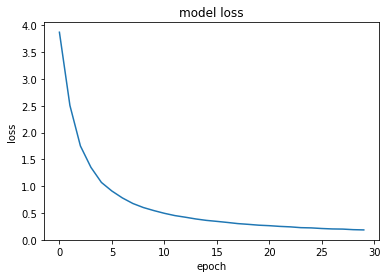

In [43]:
## plot loss- categorical crossentropy 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

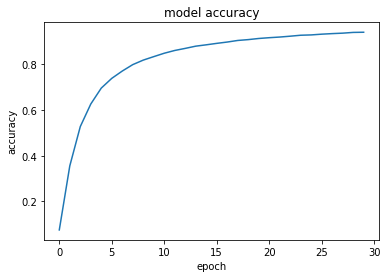

In [44]:
## plot accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [45]:
## saves model weights and model architecture; can be loaded to make predictions or continue training 
classifier.save('final.h5')